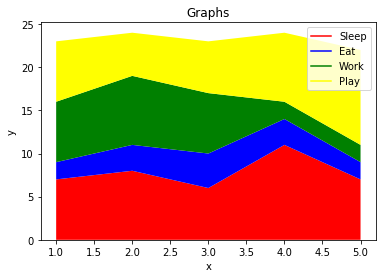

In [7]:
import matplotlib.pyplot as plt
days=[1,2,3,4,5]
sleep=[7,8,6,11,7]
eat=[2,3,4,3,2]
work=[7,8,7,2,2]
play=[7,5,6,8,11]

plt.plot([],[],color='red',label='Sleep',linewidth=5)
plt.plot([],[],color='blue',label='Eat',linewidth=5)
plt.plot([],[],color='green',label='Work',linewidth=5)
plt.plot([],[],color='yellow',label='Play',linewidth=5)

plt.stackplot(days,sleep,eat,work,play,colors=['red','blue','green','yellow'])  #stackplot

plt.xlabel("x")
plt.ylabel("y")
plt.title("Graphs")
plt.legend()          ## if we put "" here in brackets then that plot for color identification will never appear
plt.show()

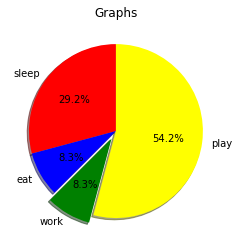

In [4]:
import matplotlib.pyplot as plt
days=[1,2,3,4,5]
sleep=[7,8,6,11,7]
eat=[2,3,4,3,2]
work=[7,8,7,2,2]
play=[7,5,6,8,11]

slices=[7,2,2,13]
activities=['sleep','eat','work','play']
cols=['red','blue','green','yellow']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow=True,
        explode=(0.1,0,0,0),
       autopct='%1.1f%%')   # attribute "startangle" for start pie chart from 90 degree
    # "explode" attribute to show a particular section separately
    # "autopct" attribute to show percentage 
plt.title("Graphs")
plt.show()

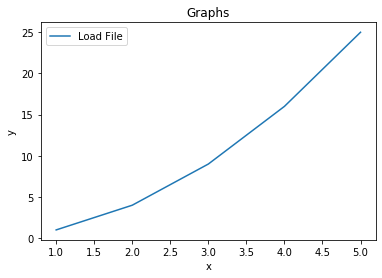

In [15]:
import csv
import matplotlib.pyplot as plt

x=[]
y=[]
with open('sample_data.csv','r') as csvfile:
    plots=csv.reader(csvfile,delimiter=',')
    i=1
    for row in plots:
        if i!= 1:
            x.append(int(row[0]))
            y.append(int(row[1]))
        else:
            pass
        i+=1

plt.plot(x,y,label="Load File")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graphs")
plt.legend()          ## if we put "" here in brackets then that plot for color identification will never appear
plt.show()

In [21]:
## Using numpy we can unload file but there should be two comma separated values there
import numpy as np
#  x,y = np.loadtxt("sample_data.csv",delimiter=',',unpack=True)
#  plt.plot(x,y,label='Load from File')


## load data from url sample
import urllib
import matplotlib.dates as mdates

def bytespdate2num(fmt,encodin='utf-8'):
    strconverter=mdates.strpdate2num(fmt)
    def byteconverter(b):
        s=b.decode(encoding)
        return strconverter(s)
    return bytesconverter

def graph_Data(stock):
    stock_price_url="http://chartapi.finance.yahoo.com/instrument/1.0/"+stock+"/chartdata;type=quote;range=10y/csv"
    source_code=urllib.request.urlopen(stock_price_url).read().decode()
    stock_data=[]
    split_source=source_code.split("\n")
    for line in split_source:
        split_line=line.split(",")
        if len(split_line) ==6:
            if 'values' not in line and 'labels' not in line:      ## "not in" to check contains of string in a line
                stock_data.append(line)

    date,closep,highp,lowp,openp,volume=np.loadtxt(stock_data,delimiter=',',unpack=True,
                                              converters={0:bytespdate2num('%Y%m%d')})   #"%Y%m%d" date format of data taken
# "converters" attribute if you have to convert any data here "0" represents the index
# %Y - Full Year, %y - Partial Year, %m - number month, %d - number day, %H - hours, %M - minutes, %S - seconds

    plt.plot_date(date,closep,color='red')
    plt.plot_date(date,highp,color='yellow')
    plt.plot_date(date,lowp,color='green')
    plt.plot_date(date,openp,color='blue')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("Graphs")
    plt.legend(["Close Price","High Price","Low Price","Open Price"])
    plt.show()              
                
graph_Data('TSLA')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>